# 3. Linear Neural Networks

## 3.1. Linear Regression

Linear regression

training data set / training set

 -> sample / data point / data instance

 -> label / target
 
 -> feature / covariate
 

sample: $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$

label: $y^{(i)}$

### 3.1.1. Basic Elements of Linear Regression


#### 3.1.1.1. Linear Model

$ \mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b. $

w: weight

b: bias / offset / intercept

**affine transformation** of input feature (linear transformation + translation)

Before finding model parameters, we need two other things: 
1. a quality **measure** for some given model; 
2. a **procedure for updating** the model to improve its quality.

#### 3.1.1.2. Loss Function

$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2
$
$
L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.
$

$
\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).
$

#### 3.1.1.3. Analytic Solution

minimize $\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$

-> $\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$

While simple problems like linear regression may admit analytic solutions, we should not get used to such good fortune. Although analytic solutions allow for nice mathematical analysis, the requirement of an analytic solution is so restrictive that it would exclude all of deep learning.

#### 3.1.1.4. Minibatch Stochastic Gradient Descent

Gradient descent (Theory from: Taylor's theorem/Formula)

One of the variant of GD: minibatch stochastic GD

$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).
$

$ \mathcal{B}: $ number of batched data

In linear case: 
$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}
$
Repeat Iterate

$\mathcal{B}$: Batch Size

$\eta$: Learning Rate

Hyperparameter / Hyperparameter Tuning

However, for more complicated models, like deep networks, the loss surfaces contain many minima(need tuning/other IDK techniques  to find).

Generalization is even harder than minimize the loss on training dataset.

-> [Empirical Error/ Generalization Error/ Bias/ Variance / Overfitting & Underfitting/ Cross Validation](https://blog.csdn.net/zhihua_oba/article/details/78684257)

#### 3.1.1.5. Making Predictions with the Learned Model

Prediction versus Inference

We will try to stick with prediction because calling this step inference, despite emerging as standard jargon in deep learning, is somewhat of a misnomer. In statistics, inference more often denotes estimating parameters based on a dataset. This misuse of terminology is a common source of confusion when deep learning practitioners talk to statisticians.

### 3.1.2. Vectorization for Speed


In [2]:
import math
import time
import numpy as np
import torch

In [3]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [4]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [23]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.07360 sec'

In [24]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00035 sec'

### 3.1.3. The Normal Distribution and Squared Loss

$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right). $

In [20]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma **2 * (x - mu)**2) #很显然 这里用np是因为函数要进行向量化/张量化运算

In [26]:
from MyPackage.lineplot import plot

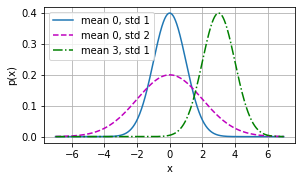

In [30]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

One way to motivate linear regression with the mean squared error loss function (or simply squared loss) is to formally assume that observations arise from noisy observations, where the noise is normally distributed as follows:
$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2).
$


Thus, we can now write out the likelihood of seeing a particular  𝑦  for a given  𝐱  via
$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).
$

Now, according to the principle of maximum likelihood, the best values of parameters  𝐰  and  𝑏  are those that maximize the likelihood of the entire dataset:
$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).
$

For historical reasons, optimizations are more often expressed as minimization rather than maximization. So, without changing anything we can minimize the negative log-likelihood.
$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.
$


### 3.1.4. From Linear Regression to Deep Networks


#### 3.1.4.1. Neural Network Diagram

![LinearRegressionPicture](Image/1.png)

Feature Dimensionality: d

Note that the input values are all given and there is just a single computed neuron. Focusing on where computation takes place, conventionally we do not consider the input layer when counting layers. 

#### 3.1.4.2. Biology


![Real Neuron](image/2.png)

### 3.1.5 Summary

- Key ingredients in a machine learning model are training data, a loss function, an optimization algorithm, and quite obviously, the model itself.

- Vectorizing makes everything better (mostly math) and faster (mostly code).

- Minimizing an objective function and performing maximum likelihood estimation can mean the same thing.

- Linear regression models are neural networks, too.

### 3.1.6 Exercise

#### Q1


1. $y = \sum_i(x_i-b)^2\\ \frac{\partial y}{\partial b} = 2nb - 2 \sum_i x_i + \sum_i x_i = 0
   $

2. When we add bias into our formula:
$ y = \sum_i (x_i-b+\epsilon)^2
$
Apparently, $\epsilon \sim \mathcal{N}$ 

#### Q2